# Homework 1


Student: Han Myrda

Source article: “Prague to ban escooters after residents complain of chaos on sidewalks” — *The Guardian*, 20 October 2025.
https://www.theguardian.com/world/2025/oct/20/prague-to-ban-e-scooters-after-residents-complain-of-chaos-on-sidewalks

**Data & Context**  
I chose this article because I found it interesting and I would like to see a similar ban happen in Warsaw with e-scooters being banned, as they are planned to be in Prague. I believe they are a real everyday danger to pedestrians.

# Pasting the article text

In [24]:
# Paste your chosen article text below between the triple quotes.
# This is the data we will analyze.

text = '''
Prague to ban e-scooters after residents complain of chaos on pavements Czech city wants to promote wider use of shared bike services and says e-scooters have higher accident rates

Reuters in Prague Mon 20 Oct 2025 17.34 CEST Share Prague will ban electric scooter rentals from January 2026, with a deputy mayor of the Czech capital criticising them for causing chaos on pavements.

Council members on Monday approved regulatory changes concerning shared transport in the city, where nearly 1.4 million people live and where the cobblestoned streets and history attracted more than 8 million tourists in 2024.

While bikes – both pedal and electric – face new rules on where they can be parked, e-scooters are not addressed in the regulations, in effect stopping their use in the city.

“The end of electric scooters approved!”, the national Pirate party chair, Zdeněk Hřib, who is a deputy mayor in charge of transport at Prague’s city hall, said on X on Monday.

“We are introducing clear rules that will clear public space from uncontrolled scooter traffic, which was often used in the city centre more as a tourist attraction than a means of transport and caused chaos on and in pedestrian zones.”

Line of e-scooters on the ground View image in fullscreen A deputy mayor said the e-scooters caused chaos on pavements and in pedestrian zones. Photograph: Tashi Vondracek/Shutterstock Prague is one of many popular European tourist destinations to have cracked down on e-scooters in recent years. Cities have imposed strict safety rules, such as requiring helmets and insurance in Italian cities, or banned rentals altogether, as in Paris and Madrid. Finland has barred under-15s from using them.

Prague officials said they had acted on complaints from residents over the dangers of the scooters whizzing by on pavements or in parks, or blocking pavements or street parking spots when not in use.

The city, which wants to promote wider use of shared bike services, said e-scooters had higher accident rates than bikes.

skip past newsletter promotion Sign up to This is Europe

Free weekly newsletter The most pressing stories and debates for Europeans – from identity to economics to the environment

Enter your email address Marketing preferences

Get updates about our journalism and ways to support and enjoy our work. Sign up Privacy Notice: Newsletters may contain information about charities, online ads, and content funded by outside parties. If you do not have an account, we will create a guest account for you on theguardian.com to send you this newsletter. You can complete full registration at any time. For more information about how we use your data see our Privacy Policy. We use Google reCaptcha to protect our website and the Google Privacy Policy and Terms of Service apply. after newsletter promotion Lime, one of the biggest operators of shared e-scooters in the city, said it regretted the decision. In cities where there was “constructive dialogue” with operators, “scooters can work very well and serve citizens”, the Czech news agency CTK quoted Lime’s country director, Václav Petr, as saying.

Lime did not immediately reply to further questions.
'''
print(text[:500])  # preview the first 500 characters


Prague to ban e-scooters after residents complain of chaos on pavements Czech city wants to promote wider use of shared bike services and says e-scooters have higher accident rates

Reuters in Prague Mon 20 Oct 2025 17.34 CEST Share Prague will ban electric scooter rentals from January 2026, with a deputy mayor of the Czech capital criticising them for causing chaos on pavements.

Council members on Monday approved regulatory changes concerning shared transport in the city, where nearly 1.4 mil


# Importing libraries


In [25]:
# Import required libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 82.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Regex extraction

In [28]:
# Step 1: Define and apply >3 regex patterns.
# We'll look for URLs, dates, and numbers.
# Then, we print them and briefly comment on accuracy.

patterns = {
    'URLs': r'https?://[^\s]+',
    'Dates': r'\b\d{1,2}\s(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}\b',
    'Numbers': r'\b\d+\b'
}

matches = {}
for name, pattern in patterns.items():
    matches[name] = re.findall(pattern, text)
    print(f"{name}: {matches[name][:10]}")  # show first few results

# Comments:
# - URLs pattern catches most links but may include punctuation.
# - Dates pattern focuses on full written dates, might miss short ones like 'Oct 20'.
# - Numbers includes all digits, not distinguishing years or counts.

URLs: []
Dates: []
Numbers: ['20', '2025', '17', '34', '2026', '1', '4', '8', '2024']


# NLP processing

In [29]:
# Step 2: Tokenize, lowercase, remove stopwords, and stem.
# I used lemmatization instead of stemming because it produces meaningful base forms of words.
doc = nlp(text)
tokens = [token for token in doc if not token.is_space]
stop_words = set(nltk.corpus.stopwords.words('english'))

lemmas = [token.lemma_.lower() for token in tokens
          if token.is_alpha and token.lemma_.lower() not in stop_words]
# Count top 15 most common tokens

freq = Counter(lemmas)
top15 = freq.most_common(15)
print("Top 15 lemmas (lemma : count):")
for lemma, cnt in top15:
    print(lemma, ":", cnt)

Top 15 lemmas (lemma : count):
scooter : 13
city : 10
e : 8
use : 8
say : 7
prague : 6
pavement : 5
share : 5
chaos : 4
bike : 4
newsletter : 4
ban : 3
czech : 3
service : 3
electric : 3


# Regex + NLP combo

In [30]:
# Step 3: Combine regex and NLP.
# Example: find all numbers and the following word from the tokenized text.

pairs = []
for i, token in enumerate(tokens[:-1]):
    if re.match(r'\d+', str(token)):  # Convert token to string
        pairs.append((token, tokens[i+1]))

print(pairs[:15])  # show first 15 pairs
# Comment: This simple method can miss cases where the number is followed by punctuation or stop words.

[(20, Oct), (2025, 17.34), (17.34, CEST), (2026, ,), (1.4, million), (8, million), (2024, .)]


# Visualization

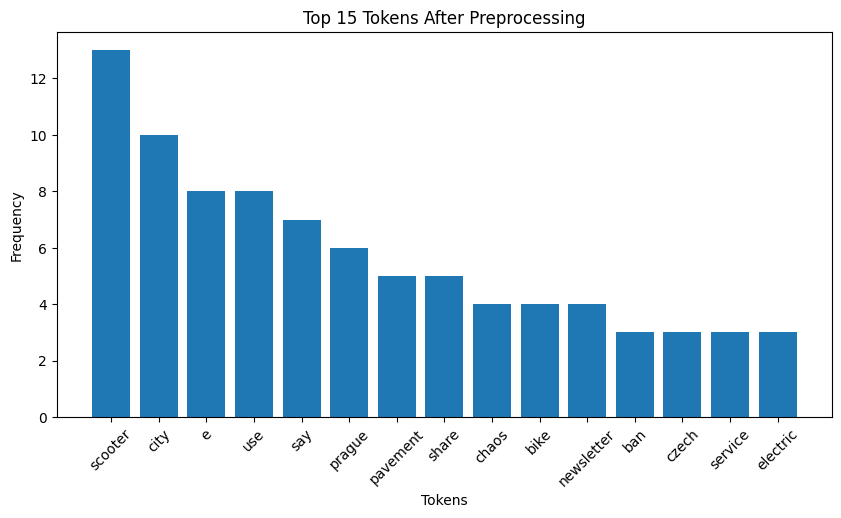

In [31]:
# Step 4: Visualize top 15 tokens.
# We'll create a simple bar chart.

words, counts = zip(*top15)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title('Top 15 Tokens After Preprocessing')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()

## My short report on the homework
 For the first assignment I chose a news article about electric scooters in Prague, because it had various data points like URLs, dates, and numerical values.
 I used then used regex to identify and extract structured patterns (dates, numbers, URLs). Apart from occasionally missing variations, like abbreviated date formats regex worked very well.
 In the NLP processing phase I used SpaCy for tokenization and lemmatization, and NLTK for stopword removal. After that I identified the top 15 most frequent tokens, which were related to: scooters, bans, and Prague.
 In the part where I used both regex and NLP, I extracted number-noun pairs. Then I visualised it through a bar chart to show the frequency of the top tokens.
 This assignment presented some challenges for me. Particularly due to the limited and not easily understandable (due to not using python or these tools ever in my life) in-class explanation. However through some researching and self-guided learning with my best friend AI I successfully integrated all the tools and methods, resulting in my homework being completed.